# Octave Programming Assignment: 

## Neural Networks Learning

## 2020년 08월 23일 안상호


In [1]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

# 1. Neural Networks

## 1.1 Visualizing the data

Loading and Visualizing Data ...


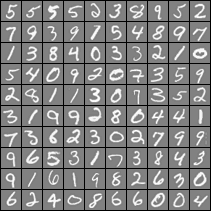

In [2]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex4data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

In [3]:
size(X)

ans =

   5000    400



## 1.2. Model representation

Feedforward (Fowardpropagation)

순전파 

In [4]:
%% ================ Part 2: Loading Parameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% The matrices Theta1 and Theta2 will now be in your workspace
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26


% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];


Loading Saved Neural Network Parameters ...


In [5]:
size(nn_params, 1) == 25 * 401 + 10 * 26

ans = 1


## 1.3. Feedfoward and cost function

> `nnCostFunction`: Regularization이 없는 간단한 Cost Function으로 $y$를 원-핫 인코딩 방식으로 처리해서 해결


$$
J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \left[ -y_{k}^{(i)} \log{((h_{\theta}(x^{(i)}))_{k})} - (1 - y_{k}^{(i)})\log{(1 - (h_{\theta}(x^{(i)}))_k)} \right]
$$

- $K$: 클래스의 갯수
- $h_{\theta}(x^{(i)}) = a_k^{(3)}$: k번째 output 유닛



In [6]:
%% ================ Part 3: Compute Cost (Feedforward) ================
%  To the neural network, you should first start by implementing the
%  feedforward part of the neural network that returns the cost only. You
%  should complete the code in nnCostFunction.m to return cost. After
%  implementing the feedforward to compute the cost, you can verify that
%  your implementation is correct by verifying that you get the same cost
%  as us for the fixed debugging parameters.
%
%  We suggest implementing the feedforward cost *without* regularization
%  first so that it will be easier for you to debug. Later, in part 4, you
%  will get to implement the regularized cost.
%
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;




Feedforward Using Neural Network ...


In [7]:
y_onehot = zeros(m, num_labels);

for i=1:num_labels,
    y_onehot(y == i, i) = 1;  
end

a2 = sigmoid([ones(m, 1) X] * Theta1');
h = sigmoid([ones(m, 1) a2] * Theta2'); 

J = (1 / m) * sum((-y_onehot .* log(h) - (1-y_onehot) .* log(1-h))(:))

J =  0.28763


In [8]:
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);

parse error near line 91 of file /home/sanghoho/Desktop/Data/Course/machine-learning/ex4/nnCostFunction.m

  syntax error

>>> Delta = 
            ^

Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


## 1.4. Regularized cost function

> 이번에는 Regularizaiton 규칙을 적용하여 Cost Function을 구현해보자

- 주의할 점은 1 ~ 400 등으로 인덱싱하는 것이 아니라, 2번째 부터 401번째 까지 인덱싱해야한다는 것이다.  
- 주어진 $\Theta$ 에서는 1번째 항목 (열;column) 이 bias 가중치이기 때문이다. 

$$
J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \left[ -y_{k}^{(i)} \log{((h_{\theta}(x^{(i)}))_{k})} - (1 - y_{k}^{(i)})\log{(1 - (h_{\theta}(x^{(i)}))_k)} \right] +
\dfrac{\lambda}{2m} \bigg[ \sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2  + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2  \bigg]
$$


In [9]:
%% =============== Part 4: Implement Regularization ===============
%  Once your cost function implementation is correct, you should now
%  continue to implement the regularization with the cost.
%

fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;




Checking Cost Function (w/ Regularization) ... 


In [10]:
size(Theta1)
size(Theta2)

ans =

    25   401

ans =

   10   26



In [11]:
(lambda / (2*m)) * ( sum((Theta1 .^ 2)(:)) + sum((Theta2 .^ 2)(:)) )
(lambda / (2*m)) * ( sum((Theta1(:, 2:(input_layer_size+1)) .^ 2)(:)) + sum((Theta2(:, 2:(hidden_layer_size+1)) .^ 2)(:)) )

ans =  0.096859
ans =  0.096141


In [49]:
y_onehot = zeros(m, num_labels);

for i=1:num_labels,
    y_onehot(y == i, i) = 1;  
end

a2 = sigmoid([ones(m, 1) X] * Theta1');
h = sigmoid([ones(m, 1) a2] * Theta2'); 

reg = (lambda / (2*m)) * ( sum((Theta1(:, 2:(input_layer_size+1)) .^ 2)(:)) + sum((Theta2(:, 2:(hidden_layer_size+1)) .^ 2)(:)) );
J = (1 / m) * sum((-y_onehot .* log(h) - (1-y_onehot) .* log(1-h))(:)) + reg

J =  0.38377


In [50]:
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


# 2. Backpropagation

`nnCostFunction.m` 에서 `grad` 부분 구현

## 2.1. Sigmoid gradient

sigmoid 함수의 특성 때문에 너무 크거나 작은 값에 대응하는 기울기는 0에 근접할 것이고, 

$z=0$일 경우 0.25일 것이다. 


$$
g'(z) = \dfrac{d}{dz} g(z) = g(z)(1-g(z)) \\
\text{sigmoid}(z) = g(z) = \dfrac{1}{1+e^{-z}}
$$



In [14]:
%% ================ Part 5: Sigmoid Gradient  ================
%  Before you start implementing the neural network, you will first
%  implement the gradient for the sigmoid function. You should complete the
%  code in the sigmoidGradient.m file.
%

fprintf('\nEvaluating sigmoid gradient...\n')


Evaluating sigmoid gradient...


In [15]:
sigmoidGradient(0)

ans =  0.25000


In [16]:
g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  0.196612 0.235004 0.250000 0.235004 0.196612 

## 2.2. Random initialization

- symmetry breaking을 위해서 $\left[-\epsilon_{init}, \epsilon_{init} \right]$ 값을 가지도록 초기화
- 초기 $\epsilon_{init}=0.12$ 로 한다
    + A good choice of $\epsilon_{init}$ is $\epsilon_{init} = \dfrac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$, where $L_{in} = s_l$ and $L_{out} = s_{l+1}$ are the number of units in the layers adjacent to $\Theta^{(l)}$
.

In [17]:
%% ================ Part 6: Initializing Pameters ================
%  In this part of the exercise, you will be starting to implment a two
%  layer neural network that classifies digits. You will start by
%  implementing a function to initialize the weights of the neural network
%  (randInitializeWeights.m)

fprintf('\nInitializing Neural Network Parameters ...\n')


Initializing Neural Network Parameters ...


In [18]:

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

## 2.3. Backpropagation

1. Foward Propagaion
2. compute error term $\delta_j^{(l)}$


$$
\begin{align}
&2). \ \delta_k^{(3)} = \big( a_k^{(3)} - y_k \big) \\
&3).\delta^{(2)} = \big( \Theta^{(2)} \big)^T \delta^{(3)} .* g'(z^{(2)}) \\
&4).\Delta^{(l)} = \Delta^{(l)} + \delta^{l+1} \big( a^{(l)} \big)^T \\
&5). \dfrac{\partial}{\partial \Theta} J(\Theta) = D = \dfrac{1}{m} \Delta
\end{align}
$$


### 2.3.1. Foward Propagation

In [73]:
a1 = [ones(m, 1) X]; % (5000, 401)

z2 = a1 * Theta1'; % (5000, 401) X (401, 25)  
a2 = [ones(m, 1) sigmoid(z2)]; % (5000, 26)

z3 = a2 * Theta2'; % (5000, 26) X (26, 10)
a3 = sigmoid(z3); % (5000, 10)

### 2.3.2. Regularized Cost Function

In [74]:
y_onehot = zeros(num_labels, m);

for i=1:num_labels,
    y_onehot(i, y == i) = 1;  
end

y_onehot(:, 1);

In [76]:
reg = (lambda / (2*m)) * ( sum((Theta1(:, 2:(input_layer_size+1)) .^ 2)(:)) + sum((Theta2(:, 2:(hidden_layer_size+1)) .^ 2)(:)) );

J = (1 / m) * sum((-y_onehot .* log(a3)' - (1-y_onehot) .* log(1-a3)')(:)) + reg  

J =  0.38377


### 2.3.3. Back Propagation

In [56]:

d3 = a3' - y_onehot(:, 1); % (10, 1)
d2 = Theta2' * d3  .* [1 sigmoidGradient(z2)]';
d2 = d2(2:end);
size(d3), size(d2)

ans =

   10    1

ans =

   25    1



- for-loop

In [85]:
Theta1_grad = zeros(size(Theta1));
Theta2_grad = zeros(size(Theta2));

for t=1:m,
    delta_3 = a3(t, :)' - y_onehot(:, t); % (10, 1)
    delta_2 = Theta2(:, 2:hidden_layer_size+1)' * delta_3  .* sigmoidGradient(z2(t, :))';

    Theta2_grad = Theta2_grad + delta_3 * a2(t, :); 
    Theta1_grad = Theta1_grad + delta_2 * a1(t, :);
    
end

Theta2_grad = Theta2_grad / m;
Theta1_grad = Theta1_grad / m;


- vectorization

In [86]:
delta_3 = a3' - y_onehot;
delta_2 = Theta2(:, 2:hidden_layer_size+1)' * delta_3 .* sigmoidGradient(z2)';

size(delta_3), size(delta_2)

ans =

     10   5000

ans =

     25   5000



In [87]:
size(delta_3 * a2)

ans =

   10   26



In [88]:
size(delta_2 * a1)

ans =

    25   401



In [92]:
Theta2_grad - (delta_3 * a2) / m
Theta1_grad .- (delta_2 * a1) / m

ans =

 Columns 1 through 6:

  -2.6021e-17   6.2884e-18  -8.2670e-19   2.3852e-18  -2.1034e-17   6.5052e-18
   1.0246e-17  -6.5052e-19   1.3010e-18   3.0358e-18  -1.2794e-17  -2.0810e-17
   2.8135e-17  -2.8189e-18  -2.4069e-17   1.5179e-18  -6.0580e-18  -1.2685e-17
  -1.0354e-17  -2.1142e-17  -5.6379e-18   8.0773e-18   1.3010e-18   4.4181e-18
   6.2884e-18  -2.1684e-19   5.8547e-18   3.2526e-18   9.5952e-18  -1.3227e-17
  -1.2794e-17   1.8974e-19  -2.1684e-19  -1.3769e-17   8.2399e-18   4.9331e-18
  -3.4152e-17  -2.4611e-17   2.7105e-18   1.3010e-18  -9.7578e-19  -5.6379e-18
   2.4937e-18  -3.1984e-18   4.7705e-18  -3.5914e-17  -2.2372e-17   2.9273e-18
   2.9273e-17  -1.3607e-17   7.2642e-18  -3.7947e-18  -5.6379e-18   1.4461e-17
  -8.1857e-18  -2.1684e-19   4.3368e-19   1.1221e-17   3.1442e-18  -5.4210e-19

 Columns 7 through 12:

   4.6079e-19   3.9031e-18  -5.4210e-18   3.7405e-18   6.5052e-18  -1.3878e-17
  -1.6263e-19  -4.9873e-18  -1.7347e-18  -6.8305e-18   1.0842e-18   1.0625e-

   0.0000e+00  -2.1176e-22  -2.1176e-22   7.9409e-23   6.6174e-24   8.0779e-28
  -2.1176e-22   2.1176e-22   0.0000e+00   0.0000e+00  -6.6174e-24   8.2395e-26
  -4.2352e-21  -1.0588e-21   2.1176e-22   5.2940e-23   3.3087e-24   0.0000e+00
   4.6587e-21  -2.1176e-22   5.2940e-22   0.0000e+00   3.3087e-24  -3.2312e-27
  -1.4426e-21  -4.2352e-22  -4.2352e-22   2.1176e-22   1.3235e-23  -2.0680e-25
  -2.1176e-21   6.3527e-22   6.3527e-22  -2.6470e-23   0.0000e+00   0.0000e+00
   1.2705e-21   1.9058e-21   4.2352e-22   1.0588e-22   0.0000e+00   2.0680e-25
   2.1176e-22   7.4115e-22   0.0000e+00   0.0000e+00   9.9262e-24   3.8774e-26
   0.0000e+00   4.2352e-22   1.0588e-21   5.2940e-23   0.0000e+00  -2.5849e-26
   1.6941e-21  -8.4703e-22  -3.1764e-22   3.3087e-24   0.0000e+00   5.1699e-25
   1.3764e-21   2.1176e-22   0.0000e+00   1.6544e-23  -3.1019e-24   0.0000e+00
  -2.1176e-22  -3.1764e-22  -7.9409e-23   8.2718e-25  -1.7448e-25   2.0680e-25
  -3.1764e-22   4.2352e-22  -1.0588e-22   1.3235e-23

  -2.1684e-19   9.7578e-19   5.4210e-20  -1.4637e-18   2.0668e-18   1.0842e-19
   4.7434e-20   1.1236e-19   3.3881e-20   1.0842e-19   1.4992e-19   1.2875e-18
  -1.5247e-20   0.0000e+00   2.9477e-19  -3.1848e-19  -1.3146e-18   1.6263e-19
  -3.8116e-21   1.6263e-19   1.6263e-19   3.5237e-19  -4.3537e-19  -1.3553e-19
   1.0842e-19   1.0842e-19  -2.0329e-19   2.5750e-19  -2.7105e-20   1.5352e-19
   0.0000e+00   2.7105e-19   1.4823e-19   2.0668e-19   4.3368e-19  -2.1684e-19
   1.3553e-20   5.4210e-20   3.1171e-19  -3.3881e-19  -7.3184e-19   7.4539e-19
   1.1858e-20  -1.2197e-19  -6.0986e-19  -6.9796e-19   1.0842e-18   2.0329e-19
   4.0658e-20  -2.1684e-19   3.3881e-19   4.3368e-19  -1.2570e-18   8.8769e-19
   7.6233e-21  -9.8256e-20   5.4210e-20   9.4868e-20   5.4210e-20  -1.5585e-19
  -5.0822e-20   0.0000e+00   5.9631e-19  -4.8789e-19  -1.8228e-18  -4.0658e-19
   2.0329e-20   3.0493e-20   9.9950e-20  -5.2177e-19   3.5237e-19  -2.7105e-19

 Columns 91 through 96:

   6.0986e-20   9.5545e-19

   1.6263e-18  -2.7647e-18   2.4395e-18   1.2875e-18   1.6263e-19  -2.6089e-18
   3.0900e-18   1.6534e-18   6.3697e-19   5.1415e-19  -1.9651e-19  -2.5513e-18
   5.0958e-18   2.7105e-19   1.8974e-18   1.1113e-18   6.7763e-20  -1.6284e-18
  -6.1528e-18   5.1500e-19  -3.0764e-18  -1.8702e-18   3.9167e-18  -8.3348e-19
  -3.2526e-18  -3.1171e-18  -1.0842e-18   1.6399e-18  -8.4026e-19  -3.0900e-18
  -1.2468e-18   5.6921e-19  -9.2157e-19   7.3184e-19   2.6495e-18  -2.7740e-19
   1.3824e-18   1.8702e-18   6.7763e-20   1.6263e-19   9.7578e-19   4.4723e-19
  -4.1335e-19   1.0300e-18  -4.9806e-19  -6.0173e-18  -2.3852e-18   4.9467e-19

 Columns 139 through 144:

   3.1171e-19   1.8974e-19  -1.6941e-20  -4.2352e-22  -2.5411e-21  -8.1315e-20
   4.0658e-19  -5.4210e-20   2.8799e-20  -3.1764e-22  -8.4703e-22  -6.7763e-20
   1.0164e-18   0.0000e+00   7.6233e-21   5.2940e-23   6.2469e-21   5.4210e-20
   1.9922e-18  -1.0842e-19   2.0329e-20  -7.9409e-23   1.6941e-21  -6.7763e-21
  -6.2342e-19   4.3029e-

  -8.4703e-21   2.7529e-21  -1.3553e-20   1.8974e-19  -2.7105e-18   1.7347e-18
   0.0000e+00  -1.6941e-21  -1.3553e-20   4.3368e-19  -5.9631e-19  -2.1684e-19
  -6.7763e-21   6.3527e-22  -5.0822e-21  -2.0329e-19   1.5585e-19   1.8974e-19
   6.7763e-21  -2.7529e-21  -1.3553e-20   5.8276e-19   5.7463e-18  -1.0910e-17

 Columns 187 through 192:

  -4.2419e-18   4.0127e-18   3.3881e-19  -1.8160e-18  -7.0473e-19  -4.3910e-18
  -1.9041e-18   4.1267e-18   7.0473e-19   2.2633e-18   1.1059e-17  -1.1967e-17
   5.7463e-18   2.9273e-18   6.5052e-19   5.1906e-18  -7.7249e-19   8.9176e-18
   3.4390e-18   8.6736e-18  -2.0058e-18   4.0387e-18  -9.7578e-19  -1.4095e-18
   3.2526e-18  -4.6553e-18  -8.1315e-19  -1.0300e-18  -5.9902e-18   1.4637e-18
   4.5265e-18  -2.9816e-19  -5.5565e-19  -2.2091e-18   3.4152e-18   1.0571e-18
  -1.2441e-17   1.4230e-19  -9.0802e-19  -8.8362e-18  -5.3668e-18  -1.0300e-18
   2.0058e-18  -7.3184e-19  -1.1520e-18   1.0300e-18  -2.1684e-19   1.1696e-17
  -2.9273e-18   1.6263e-

 Columns 235 through 240:

  -9.2157e-19  -1.5179e-18  -1.8431e-18   1.9245e-18   6.0817e-19  -4.0658e-19
   5.8005e-18   1.0842e-18  -2.8664e-18  -5.2855e-18  -8.9447e-19   1.1054e-19
   2.2429e-18  -2.1831e-18  -1.9854e-18   6.8779e-19   5.9631e-19   9.4868e-20
   1.6697e-17   4.4994e-18   1.4149e-17   3.0900e-18   2.1774e-18  -9.0802e-19
  -2.8731e-18   7.0473e-18  -2.3581e-18   1.0232e-18   1.3383e-18  -2.0329e-20
   3.0222e-18   5.4210e-19  -1.5179e-18   3.0358e-18  -1.3553e-18   2.7105e-19
   5.0280e-18   5.0415e-18   4.8789e-19   3.7947e-19  -3.9980e-19   5.9292e-19
   3.7117e-18  -5.2584e-18   1.8974e-19   5.8547e-18   1.2197e-18   3.7947e-19
   4.1742e-18  -1.3553e-19  -1.5314e-18  -2.2329e-18  -1.2333e-18  -1.1926e-18
   1.5450e-18  -1.1994e-18   4.8789e-18  -2.3683e-18  -6.2680e-19  -8.1315e-20
   1.8431e-18  -8.4026e-19   1.7049e-17   4.6214e-18  -6.7763e-19   1.3383e-19
  -1.1926e-18  -3.7168e-18  -6.5662e-18  -9.0954e-18  -2.8460e-19   2.1684e-19
   4.8654e-18  -2.3581e-1

  -8.4703e-22  -1.3553e-20   1.8974e-19   2.6292e-18   5.7598e-18  -4.0929e-18
   1.0164e-20   0.0000e+00  -5.8276e-19  -2.3039e-19  -1.9753e-18  -2.7783e-18
   1.6941e-20  -1.3553e-20  -1.9651e-19   6.3697e-19  -1.4840e-18   2.3039e-19
  -2.1006e-19  -3.2526e-19  -4.0658e-19  -8.6736e-19   3.0358e-18  -1.2197e-19
   4.7434e-20  -1.3553e-19  -5.6921e-19  -2.4801e-18   1.3824e-18   2.4937e-18
  -4.4469e-21   1.5585e-19  -2.3378e-19  -2.0871e-18  -4.9873e-18   1.1181e-18
   1.5882e-21   0.0000e+00  -3.6592e-19  -1.0842e-19   1.0029e-18  -9.3512e-19
   4.7434e-20  -6.7763e-20  -3.1171e-18   1.6390e-18   1.7347e-18   4.7434e-18
   4.0658e-20   2.9816e-19   2.0261e-18   5.0686e-18  -2.3852e-18  -6.5865e-18
  -1.1858e-20  -1.3553e-19   7.7249e-19   3.7947e-19   4.0115e-18   1.8974e-18
  -8.4703e-21  -1.1689e-19   8.1315e-20   3.0629e-18  -1.0354e-17   6.7492e-18
  -3.8116e-21   2.7105e-20  -1.3553e-19   4.0658e-19  -3.3204e-19   1.8702e-18
   0.0000e+00   1.3553e-20  -9.2157e-19  -1.0842e-19

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [94]:
%% =============== Part 7: Implement Backpropagation ===============
%  Once your cost matches up with ours, you should proceed to implement the
%  backpropagation algorithm for the neural network. You should add to the
%  code you've written in nnCostFunction.m to return the partial
%  derivatives of the parameters.
%
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;


Checking Backpropagation... 
  -0.0092782524  -0.0092782524
   0.0088991196   0.0088991196
  -0.0083601076  -0.0083601076
   0.0076281355   0.0076281355
  -0.0067479837  -0.0067479837
  -0.0000030498  -0.0000030498
   0.0000142869   0.0000142869
  -0.0000259383  -0.0000259383
   0.0000369883   0.0000369883
  -0.0000468760  -0.0000468760
  -0.0001750601  -0.0001750601
   0.0002331464   0.0002331464
  -0.0002874687  -0.0002874687
   0.0003353203   0.0003353203
  -0.0003762156  -0.0003762156
  -0.0000962661  -0.0000962661
   0.0001179827   0.0001179827
  -0.0001371497  -0.0001371497
   0.0001532471   0.0001532471
  -0.0001665603  -0.0001665603
   0.3145449700   0.3145449701
   0.1110565882   0.1110565882
   0.0974006970   0.0974006970
   0.1640908188   0.1640908188
   0.0575736493   0.0575736493
   0.0504575855   0.0504575855
   0.1645679323   0.1645679323
   0.0577867378   0.0577867378
   0.0507530173   0.0507530173
   0.1583393339   0.1583393339
   0.0559235296   0.0559235296
   0.0491

## 2.4. Gradient checking 

`computeNumericalGradient.m`

- gradient checking이 잘되었다 싶으면, 끄고(turn-off) 학습을 진행할 것 
- 기울기를 계산하는 어떤 모델에도 적용할 수 있으므로, logistic regression에서의 cost function에도 적용해볼 수 있다.

## 2.5. Regularized Neural Networks

> regularization의 적용은 backprop으로 gradient를 계산한 뒤에 항목을 추가해주는 것으로 충분


$$
\begin{align}
&\dfrac{\partial}{\partial \Theta_{ij}^{(l)}} = D_{ij}^{(l)} = \dfrac{1}{m}\Delta_{ij}^{(l)} 
&\text{for} \ j=0 \\
&\dfrac{\partial}{\partial \Theta_{ij}^{(l)}} = D_{ij}^{(l)} = \dfrac{1}{m}\Delta_{ij}^{(l)} + \dfrac{\lambda}{m}\Theta_{ij}^{(l)} 
&\text{for} \ j \geq 1
\end{align}
$$

In [97]:
fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;



Checking Backpropagation (w/ Regularization) ... 


In [101]:
reg2 = (lambda / m) * Theta2;
reg1 = (lambda / m) * Theta1;

reg2(:,1) = 0;
reg1(:. 1) = 0;

reg2

reg2 =

 Columns 1 through 6:

   0.0000000  -0.0007275  -0.0000611  -0.0014211  -0.0006347  -0.0013249
   0.0000000   0.0003694  -0.0007593   0.0011145  -0.0005511  -0.0000330
   0.0000000  -0.0011672   0.0012082  -0.0018739  -0.0001417   0.0008321
   0.0000000   0.0002778   0.0003510  -0.0000990   0.0011596  -0.0001378
   0.0000000  -0.0012269   0.0012342   0.0011706   0.0001058  -0.0012968
   0.0000000   0.0002606  -0.0005590   0.0001103  -0.0002165   0.0003717
   0.0000000   0.0007294  -0.0009006  -0.0012192  -0.0009142  -0.0014624
   0.0000000  -0.0004335  -0.0018914   0.0002195   0.0001189  -0.0004384
   0.0000000   0.0003216   0.0007818  -0.0006202  -0.0024185   0.0003490
   0.0000000  -0.0008637  -0.0007309   0.0004266   0.0002713  -0.0002157

 Columns 7 through 12:

   0.0003383   0.0007266   0.0013262   0.0002667  -0.0007095   0.0006257
  -0.0002315   0.0007771  -0.0009411  -0.0005822  -0.0013100  -0.0017102
   0.0005459  -0.0009286  -0.0004790  -0.0003936   0.0004412  -0.001

In [104]:
checkNNGradients(lambda);

  -0.009278252  -0.009278252
   0.008899120   0.008899120
  -0.008360108  -0.008360108
   0.007628136   0.007628136
  -0.006747984  -0.006747984
  -0.016767980  -0.016767980
   0.039433483   0.039433483
   0.059335556   0.059335556
   0.024764097   0.024764097
  -0.032688143  -0.032688143
  -0.060174472  -0.060174472
  -0.031961229  -0.031961229
   0.024922553   0.024922553
   0.059771762   0.059771762
   0.038641055   0.038641055
  -0.017370465  -0.017370465
  -0.057565867  -0.057565867
  -0.045196385  -0.045196385
   0.009145880   0.009145880
   0.054610155   0.054610155
   0.314544970   0.314544970
   0.111056588   0.111056588
   0.097400697   0.097400697
   0.118682669   0.118682669
   0.000038193   0.000038193
   0.033692656   0.033692656
   0.203987128   0.203987128
   0.117148233   0.117148233
   0.075480126   0.075480126
   0.125698067   0.125698067
  -0.004075883  -0.004075883
   0.016967709   0.016967709
   0.176337550   0.176337550
   0.113133142   0.113133142
   0.086162895

In [105]:
%% =============== Part 8: Implement Regularization ===============
%  Once your backpropagation implementation is correct, you should now
%  continue to implement the regularization with the cost and gradient.
%



% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);



Cost at (fixed) debugging parameters (w/ lambda = 3.000000): 0.576051 
(for lambda = 3, this value should be about 0.576051)



## 2.6. Learning parameters using fmincg

In [121]:
%% =================== Part 8: Training NN ===================
%  You have now implemented all the code necessary to train a neural 
%  network. To train your neural network, we will now use "fmincg", which
%  is a function which works similarly to "fminunc". Recall that these
%  advanced optimizers are able to train our cost functions efficiently as
%  long as we provide them with the gradient computations.
%
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));


Training Neural Network... 
Iteration    50 | Cost: 4.928393e-01


# 3. Visualizing the hidden layer

In [115]:
%% ================= Part 9: Visualize Weights =================
%  You can now "visualize" what the neural network is learning by 
%  displaying the hidden units to see what features they are capturing in 
%  the data.

fprintf('\nVisualizing Neural Network... \n')




Visualizing Neural Network... 


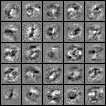

In [116]:
displayData(Theta1(:, 2:end));

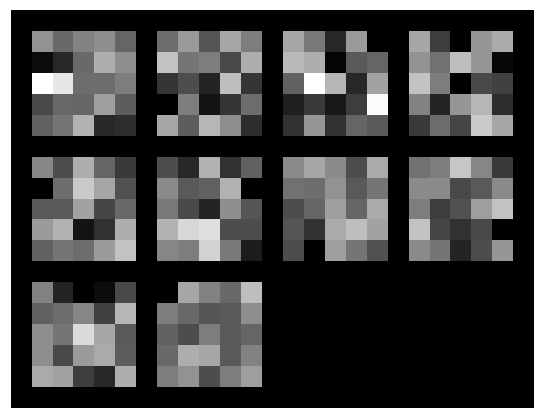

In [117]:
displayData(Theta2(:, 2:end));

# (Optional) Exercise

- accuracy 함수



In [147]:
function p = accuracy(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y)
    m = size(X, 1);

    a1 = [ones(m, 1) X];

    Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)),
                     hidden_layer_size, (input_layer_size + 1));

    Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end),
                     num_labels, (hidden_layer_size + 1));
                     
    h = sigmoid([ones(m, 1) sigmoid(a1 * Theta1')] * Theta2');
    
    [w, iw] = max(h, [], 2);
    p = sum(iw == y) / m;

end

## Change $\lambda$

In [154]:
options = optimset('MaxIter', 100);

%  You should also try different values of lambda
lambda = 0;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));
                 
accuracy(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y)

Iteration   100 | Cost: 1.183624e-01
ans =  0.99120


In [153]:
options = optimset('MaxIter', 100);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));
                 
accuracy(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y)

Iteration   100 | Cost: 3.644731e-01
ans =  0.98600


In [152]:
options = optimset('MaxIter', 100);

%  You should also try different values of lambda
lambda = 2;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));
                 
accuracy(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y)

Iteration   100 | Cost: 5.125757e-01
ans =  0.96740


## Symetric 

In [156]:
zero_nn_params = [zeros(size(Theta1))(:) ; zeros(size(Theta2))(:)];
[nn_params, cost] = fmincg(costFunction, zero_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1_zero = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2_zero = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

Iteration   100 | Cost: 2.608122e+00


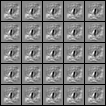

In [157]:
displayData(Theta1_zero(:, 2:end));

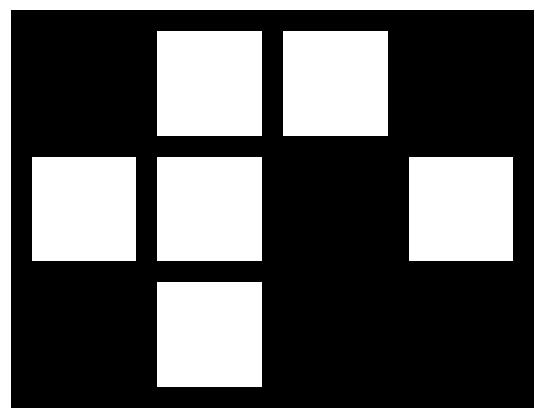

In [158]:
displayData(Theta2_zero(:, 2:end));

In [159]:
accuracy(zero_nn_params, input_layer_size, hidden_layer_size,num_labels, X, y)

ans =  0.10000
